# Function Calling
**Function calling** enables us to connect LLMs to external data and systems. 
We can define a set of functions as tools that the model has access to, and it can use them when appropriate based on the conversation history. We can then execute those functions on the **application** side, and provide the results back to the model. 

## How Function Calling Works
"Function calling" naming is confusing. LLMs don't actually call any functions themselves; they suggest which functions you should call from  pre-defined functions which you provide to the LLM in a prompt. Function calling is a type of structured ouput capability of a LLM. Yet, strctured output enables us to intergate LLMs with classical software systems.

When you use function calling, the model never actually executes functions itself, instead it simply generates parameters that can be used to call our function. 

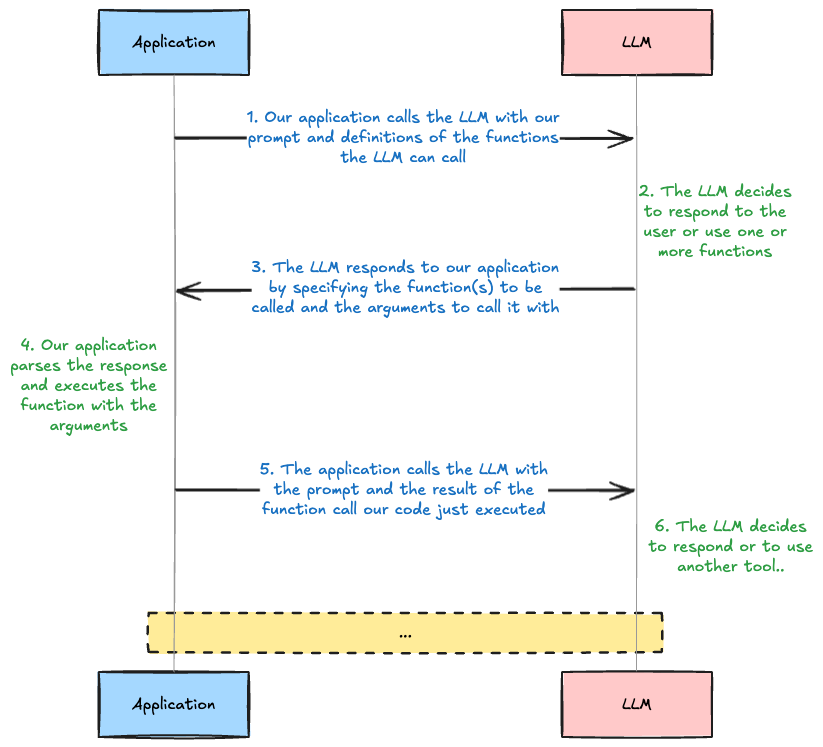

#### Warning
Before diving any deeper, remember, all an LLM does it next token prediction. Due to the principle LLM architecture all it can possibly output is one token with the highes probability. In documentation OpenAI refers to function calling as a capability. Function calling capability is achieved via fine-tuning of a model, when enables it to output data in a specific way. To oversimplify, a structured-output-capable model was just trained on more JSON. Therefore, function calling is merely JSON structured output which contains the name of a function to call and parameters for it.

#### Why do we care about function calling?
Three main reasons:
1. **Models don't have all the data**. Models acquire their "knowledge" during the training process, and that "knowlege" is stored in the model's weights, we cannot be easily updated on demand. To update "knowlege" you effectively need to update the model's weights and run all the post-training routines.

2. **Models need to be integrated with other systems**. Strcutured output capability enables output to be integrated with other parts of the system via JSON. We can even treat strctured output-enabled LLM as some sort of API which returns JSON. There is a world of difference between: 

```
Hi, my name is Hanan Ather, I'm 27, and my email is hanan@example.com

```
and 
```
{
    "name": "Hanan Ather",
    "age": 27,
    "email": "hanan@example.com"
}

```
Strcutured output not only make integrations simpler, but they easily enable tasks which normally required eloborated NLP systems. 


Many applications require models to call custom functions to trigger actions within the application or interact with external systems.

- Fetching data: enable a conversational assistant to retrieve databased on conversation, like scheduling meetings or initiating order systems
- Taking action: allowing a assistant to trigger actions based on the conversation, like scheduling meetings or initiating order returns
- Building workflows: allow assistants to execute multi-step workflows, like data extraction pipelines or content personalization

### How Strcutured Output Works
Strcutured output is a models capability to output JSON, acquired during fine-tuning. 

**Use case of strcutured output:**
- implement a natural langugage processing parser that allows users to create grocery lists out of natural langauge input. The use provides a list of groceries in written or spoken form, and the program outputs an HTML-formatted list.

  - Without LLMs, this is not such an easy task to tackle. Its easy to build a demo, but not easy to build-high quality prodcut that handles edge cases well. 

- Today we can accomplish this by: pipe user input into the LLM -> LLM outputs JSON -> Python picks it up and formats the JSON into HTML



Here is how we can define a function as a tool for the model to use: 

In [ ]:
tools = [
  {
      "type": "function",
      "function": {
          "name": "get_weather",
          "parameters": {
              "type": "object",
              "properties": {
                  "location": {"type": "string"}
              },
          },
      },
  }
]

The starting point for function calling is choosing a function in your own codebase that you'd like to enable the model to generate arguments for. 

### Handling model responses
The model only suggests function calls and generates arguments for the defined functions when appropriate. It is then up to us to decide how our application handles the execution of these suggestions. 

If the model determines that a function should be called, it will return a `tool_calls` field in the response, which we can use to determine if the model generated a function call and what the argumets were.